In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx

In [2]:
data = pd.read_csv("cosine_data.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,3654,3655,3656,3657,3658,3659,3660,3661,3662,clusters
0,1.000000,0.901283,0.891793,0.913278,0.871499,0.917266,0.940582,0.895597,0.944758,0.880468,...,0.322687,0.315993,0.320559,0.319246,0.315357,0.323804,0.308224,0.310581,0.324382,6
1,0.901283,1.000000,0.834863,0.987319,0.791588,0.996878,0.917147,0.980327,0.953548,0.979265,...,0.294142,0.288463,0.293510,0.286889,0.285678,0.293727,0.280639,0.275560,0.289416,6
2,0.891793,0.834863,1.000000,0.847589,0.748023,0.854075,0.927387,0.822864,0.882877,0.798564,...,0.368311,0.362771,0.368952,0.365428,0.360439,0.369060,0.354474,0.354395,0.363790,6
3,0.913278,0.987319,0.847589,1.000000,0.790544,0.989241,0.925770,0.989884,0.954282,0.993455,...,0.298004,0.291899,0.296963,0.291445,0.289131,0.297838,0.284765,0.281236,0.294987,6
4,0.871499,0.791588,0.748023,0.790544,1.000000,0.808344,0.826176,0.787089,0.835385,0.764657,...,0.331581,0.320835,0.326239,0.323433,0.325354,0.330628,0.315255,0.316569,0.332212,6


In [13]:
G = nx.from_pandas_edgelist(data,source="0",target="1")

In [18]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])
s = pd.Series(leaderboard,name="connections")
s.to_frame().sort_values("connections",ascending=False).head()

,connections
0.901283,2
0.392968,1
0.395235,1
0.351492,1
0.383689,1


In [17]:
data_1 = pd.read_csv("Compressed_data.csv")
G1 = nx.from_pandas_edgelist(data_1,source="A",target="B")

In [20]:
leaderboard = {}
for x in G1.nodes:
    leaderboard[x] = len(G1[x])
s = pd.Series(leaderboard,name="connections")
s.to_frame().sort_values("connections",ascending=False).head()

,connections
-1.150672,1
11.515227,1
4.567117,1
-5.262592,1
11.381722,1


In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [33]:
data_ = data_1.drop("clusters",axis=1)
data_.values.shape

(3663, 8)

In [97]:
G = nx.Graph()
for col in range(len(data_.columns)-1):
    G.add_edge(data_.columns[col],data_.columns[col+1])
    

In [98]:
print(G.nodes)
print(G.number_of_edges())
print(G.number_of_nodes())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
7
8


In [50]:
def transition(i,j,G,A):
    ldn = list(G.nodes())
    return A[ldn.index(i),ldn.index(j)]/G.degree(i)

In [51]:
def step(i,G,A):
    N=[vecino for vecino in nx.neighbors(G,i)]
    coeficient_part=[]
    for v in N:
        coeficient_part.append(transition(i,v,G,A))
    part=[]
    aux=0
    for coef in coeficient_part:
        part.append(aux+coef)
        aux=aux+coef
    r=np.random.random()
    for p in range(len(part)):
        if p==0:
            if r<part[p]:
                indexf=0
                break 
        if p>0:
            if p==len(part)-1:
                indexf=p
                break
            elif (part[p-1]<r and r<part[p])==True:
                indexf=p
                break 
    return N[indexf]

In [52]:
A = nx.to_numpy_array(G)
import random
list_nodes= list(G.nodes())
ic = random.choice(list_nodes)
orbit = [ic]
N = 10000
for i in range(N):
    ic = step(ic,G,A)
    orbit.append(ic)

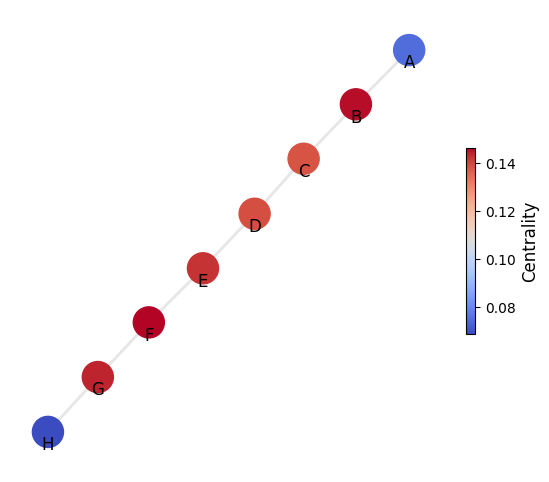

In [57]:
node_color=[float(orbit.count(i)/N) for i in G]
cmap = 'coolwarm'
plt.figure(figsize=(6,6))
pos = nx.kamada_kawai_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500, cmap=cmap)
edges = nx.draw_networkx_edges(G, pos,edge_color='0.9', width=2)
cb = plt.colorbar(nodes,fraction=0.02, pad=0.04)
cb.set_label('Centrality',fontsize=12)
cb.ax.tick_params(labelsize=10)
plt.axis('off')
for p in pos:
    pos[p][1]-=0.07
nx.draw_networkx_labels(G,pos)
plt.show()

In [62]:
data_.head()

,A,B,C,D,E,F,G,H
0,-1.150672,-2.162566,3.994892,6.618181,5.214929,-1.108929,0.263203,-2.562965
1,-2.394285,-1.477326,3.683768,6.424458,5.580158,-1.990460,0.299140,-2.551447
2,-2.623309,-1.354071,2.248332,5.424079,5.157923,-1.513553,0.687413,-1.323825
3,-2.645118,-1.045560,3.470584,6.470068,5.452596,-1.663606,0.323628,-2.894979
4,-1.753454,-2.467356,4.006952,5.563749,3.803477,-1.083701,-0.017345,-0.996623


<AxesSubplot:>

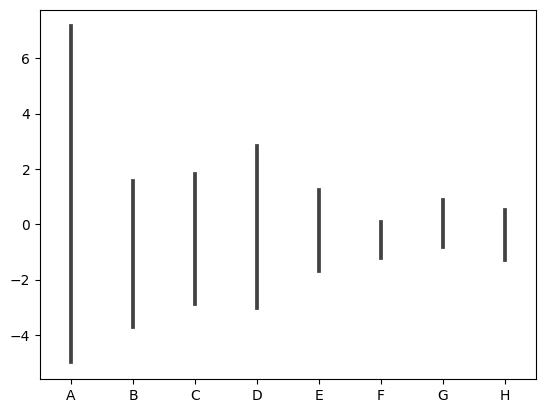

In [66]:
sns.barplot(data_,errorbar=("pi",50))

In [67]:
data_.describe()

,A,B,C,D,E,F,G,H
count,3663.000000,3663.000000,3.663000e+03,3.663000e+03,3663.000000,3.663000e+03,3.663000e+03,3.663000e+03
mean,0.000000,0.000000,1.241462e-16,-1.241462e-16,0.000000,3.103654e-17,-6.207308e-17,6.207308e-17
std,6.497574,5.194522,4.351025e+00,3.639963e+00,2.393311,2.149316e+00,1.845611e+00,1.794005e+00
min,-9.119398,-7.773914,-7.456929e+00,-7.345211e+00,-3.365301,-3.972607e+00,-4.619646e+00,-3.243082e+00
25%,-4.999532,-3.721045,-2.883284e+00,-3.018710e+00,-1.688959,-1.226962e+00,-8.125004e-01,-1.308299e+00
50%,-2.432443,-1.122438,-7.286818e-01,2.815648e-01,-0.679350,-6.249900e-01,-9.492037e-02,-2.251308e-01
75%,7.152660,1.551558,1.805427e+00,2.818060e+00,1.250790,6.925182e-02,8.868107e-01,5.128160e-01
max,13.616939,12.282853,1.095060e+01,7.585255e+00,7.375289,5.966843e+00,5.691290e+00,4.209980e+00


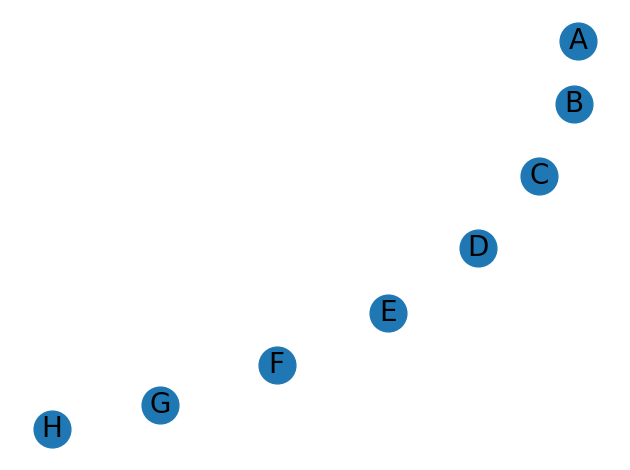

In [99]:
widths = np.array([w for *_, w in G.edges.data("A")])
pos = nx.spring_layout(G,seed=7)
nx.draw_networkx_nodes(G,pos,node_size=700)

nx.draw_networkx_labels(G,pos,font_size=20,font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()